# Decision tree:-

A decision tree is one of the supervised machine learning algorithms.

This algorothm can be used for regression and classification problems_yet, is mostly used for classification problems.

A decision tree follows a set of if-else conditions to visualize the data and classify it according to the condition.

## For example:
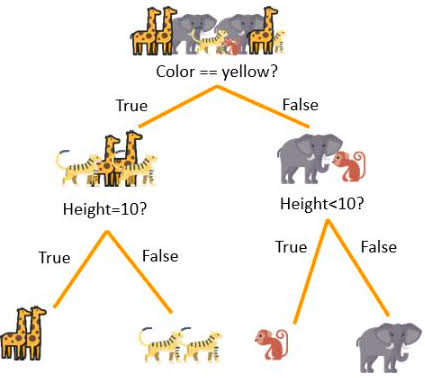

## Important terminology:

### 1- Root Node:-
this attribute is used for dividing the data into two two or more sets.

### 2- Brach or sub-tree:-
A part of the entire decision tree is called a branch or sub-tree.

### 3- Splitting:-
Dividing a node into two or more sub-nodes based on if-else conditions.

### 4- Decision nodes:-
After spliting the sub-nodes into further sub-nodes, then it is called the decision tree.

### 5- Leaf or terminal node:-
This os the end of the decision tree where it cannot be split into further sub-node.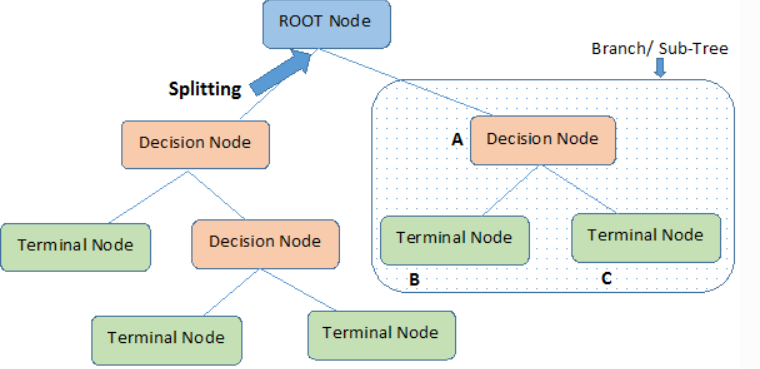



## Working of decision tree:

1- the root node feature is selected based on the results fro the Attribute Selection Measure(ASM).

2- the ASM is repeated until a leaf node, or a terminal node cannot be split into sub-nodes.


## What is Attribute Selective Measure(ASM):-
Attribute subset Selection Measure is a technique used in the data mining process for data reduction. The data reduction is necessary to make better analysis and prediction of the target variable.

The two main ASM technique are :

1-Gini index: the measure of the degree of probabilityof a particular variable being wrongly classified when it is randomly chosen is called the Gini index or Gini impurity.
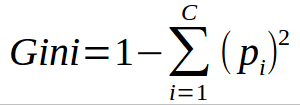

2-information Gain.(ID3)-Entropy is the main concept of this algorithm, which helps determine a feature or attribute that gives maximum information about a class is called information gain  or ID3 algorithm.

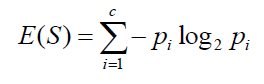

## Practical example:-

In [5]:
# reading data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('I://تطبيق machine//train_u6lujuX_CVtuZ9i (1).csv')
# data.isna().sum()
print(data.head(10))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

In [6]:
# handle null data
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
# column credit_history
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
# column gender
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
# column loan_amount_term
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
# column dependents
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
# column self employed
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
# column married
data=data[data['Married'].notna()]
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# convert str to number
data.replace({'Married':{'No':0,'Yes':1},
'Gender':{'Male':1,'Female':0},
'Self_Employed':{'No':0,'Yes':1},
'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
data.replace({"Dependents":{'3+':'3'}},inplace=True)
# data['Gender'].replace(['Male','Female'],[1,0],inplace=True)
data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,Y
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,Y
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,1,N
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,Y
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,N


In [11]:
data['Loan_Status']=data['Loan_Status'].replace(['N','Y'],[0,1])
# data['Loan_Status'].replace('Y',1)
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [14]:
# split data to x , y
y=data['Loan_Status']
x=data.drop(['Loan_Status','Loan_ID'],axis=1)

In [15]:
# split the data into traning and test
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
model=DecisionTreeClassifier( max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [55]:
data['Loan_Status'].value_counts()

1    419
0    192
Name: Loan_Status, dtype: int64

#### Before we visualize the tree, let us do some calculations and find out the root node by using Entropy.
#### Calculation 1: Find the Entropy of the total dataset
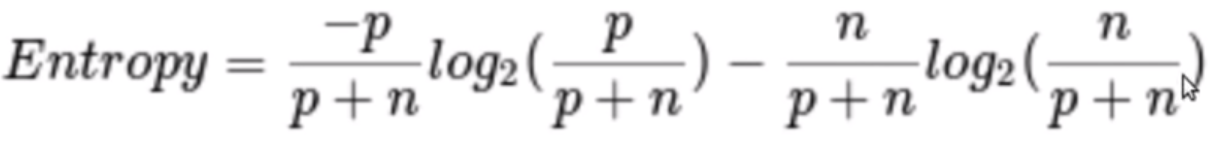
Entropy =E(s) = (-419/611)log(419/611)-(192/611)log(192/611)=0.89800615

here log is with base 2

In [19]:
for i,j in enumerate(data):
    if j=='Gender':
        res=data[data['Loan_Status']==0][j].value_counts()
        print(j) #0.742       0.397              0.691
        print(res)
        

Gender
1    155
0     37
Name: Gender, dtype: int64


###### Find the entropy and gain for every column
1- Gender :a- male. b-female

a-
p=345, n=155                          
Entropy(Gender=male)= 0.89317

b-
p=74, n=37                    
Entropy(Gender=female)= 0.9182958


I(Gender)=( Entropy(Gender=male) * (p+n)/611 )+( Entropy(Gender=female) * (p+n)/611 )= 0.897

Gain= E(s) - I(Gender)= 0.898 - 0.897 = 0.001

Compare all the gain value:-

Gain(Gender)=0.001            
Gain(Married)= 0.001                  
Gain(Education)= 0.006              
Gain(Self_Employed) = 0.001                      
Gain(Credit_History)= 0.2                   

[Text(167.4, 163.07999999999998, 'X[9] <= 0.5\ngini = 0.431\nsamples = 427\nvalue = [134, 293]'),
 Text(83.7, 54.360000000000014, 'gini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.331\nsamples = 363\nvalue = [76, 287]')]

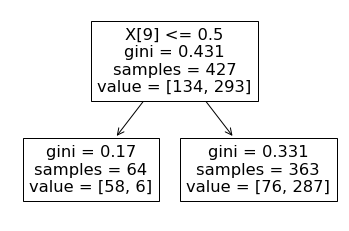

In [57]:
plot_tree(model)

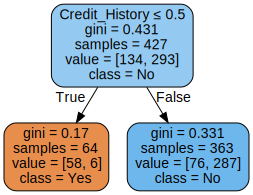

In [58]:
import graphviz
dot_data=export_graphviz(model, out_file= None, feature_names=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
    class_names=['Yes','No'],filled=True, rounded=True, special_characters=True)
graph=graphviz.Source(dot_data)
graph.render("Gini")
graph

In [59]:
model.score(x_test,y_test)

0.8097826086956522

### How to avoid Over-fitting?

Use random forest trees.
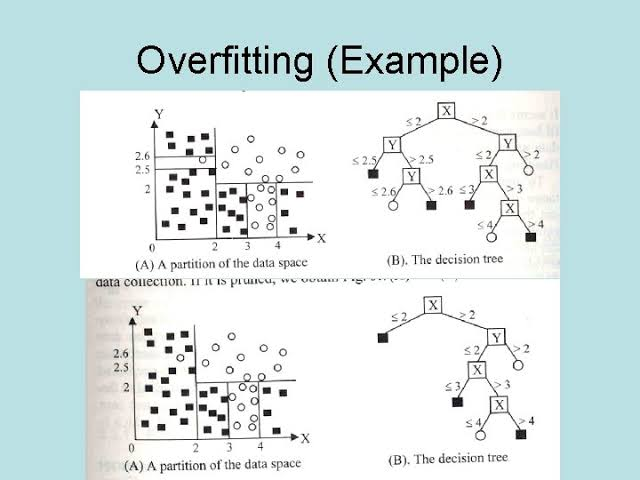

## Advantages
1- Decision trees are easy to visualize.                   
2-A decision tree does not require normalization of data.                                     
3-It can be used for predicting missing values(c4.5) not (ID3) suitable for feature engineering techniques.              

## Disadvantages           
1-Over-fitting of the data is possible.                       
2-The small variation in the input data can result in a different decision tree. This can be reduced by using feature engineering techniques.                     
3-We have to balance the data-set before training the model.                
4-Decision tree often involves higher time to train the model.                       